In [7]:
# Updating these names should be enough to run this notebook

data_folder = r"SagittalSpineSegmentationArrays"
notebook_save_folder = r"SavedNotebooks"

groundtruth_file = r"segmentation-test.npy"
prediction_file=r"prediction-test.npy"

dilate_size_mm = 5
mm_per_pixel = 1

In [14]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os 
import scipy.ndimage

from random import sample

from local_vars import root_folder

In [13]:
# Read data arrays

data_fullpath = os.path.join(root_folder, data_folder)

groundtruth_fullname = os.path.join(data_fullpath, groundtruth_file)
prediction_fullname = os.path.join(data_fullpath, prediction_file)

print("Reading ground truth from:  {}".format(groundtruth_fullname))
print("Reading predictions from:   {}".format(prediction_fullname))

groundtruth_data = np.load(groundtruth_fullname)
prediction_data = np.load(prediction_fullname)

num_groundtruth = groundtruth_data.shape[0]
num_prediction = prediction_data.shape[0]

print("\nFound {} ground truth images and {} predictions".format(num_groundtruth, num_prediction))

if num_groundtruth != num_prediction:
    print("Number of images should be equal!")
    raise

Reading ground truth from:  j:\Data\SagittalSpineSegmentationArrays\segmentation-test.npy
Reading predictions from:   j:\Data\SagittalSpineSegmentationArrays\prediction-test.npy

Found 477 ground truth images and 477 predictions


In [8]:
# Dilate only along image axes, not across images

def dialate_stack(segmentation_data, iterations):
    return np.array([scipy.ndimage.binary_dilation(y, iterations=iterations) for y in segmentation_data])

In [11]:
# Dilate ground truth

dilate_size_pixel = int(dilate_size_mm / mm_per_pixel)

groundtruth_dilated = dialate_stack(groundtruth_data[:, :, :, 0], dilate_size_pixel)

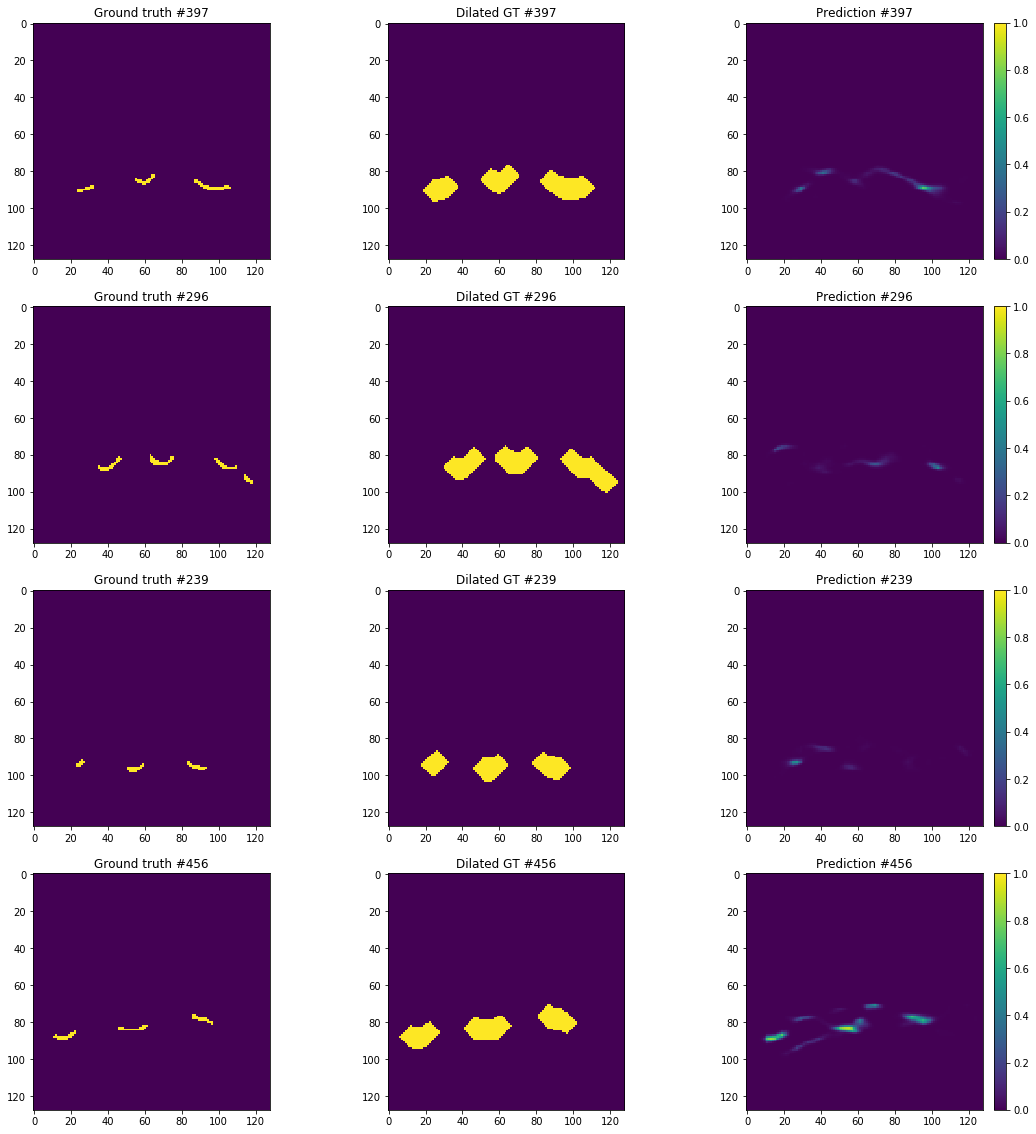

In [23]:
# Show a sample of images to check for errors

num_show = 4

all_indices = [i for i in range(num_groundtruth)]
sample_indices = sample(all_indices, num_show)

fig = plt.figure(figsize=(18, num_show * 5))
for i in range(num_show):
    a0 = fig.add_subplot(num_show, 3, i * 3 + 1)
    img0 = a0.imshow(groundtruth_data[sample_indices[i],:,:,0])
    a0.set_title("Ground truth #{}".format(sample_indices[i]))
    a1 = fig.add_subplot(num_show, 3, i * 3 + 2)
    img1 = a1.imshow(groundtruth_dilated[sample_indices[i],:,:])
    a1.set_title("Dilated GT #{}".format(sample_indices[i]))
    a2 = fig.add_subplot(num_show, 3, i * 3 + 3)
    img2 = a2.imshow(prediction_data[sample_indices[i],:,:,1], vmin=0.0, vmax=1.0)
    a2.set_title("Prediction #{}".format(sample_indices[i]))
    c = fig.colorbar(img2, fraction=0.046, pad=0.04)